In [1]:
# Import required libraries
import xarray as xr
from pathlib import Path
import numpy as np
import datetime
import pandas as pd
import cfgrib
import os
import shutil
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
moloch_cube = xr.open_dataset(Path.home() / 'hdd1/diogenis/observatory/moloch_meteo.nc')

In [3]:
moloch_cube

<xarray.Dataset>
Dimensions:         (time: 182, y: 983, x: 1253)
Coordinates:
  * time            (time) datetime64[ns] 2021-05-01 2021-05-02 ... 2021-10-31
  * x               (x) float64 18.7 18.71 18.72 18.73 ... 28.88 28.89 28.9
  * y               (y) float64 42.3 42.29 42.28 42.27 ... 34.32 34.31 34.3
Data variables:
    max_t2m         (time, y, x) float32 ...
    min_relhum_2m   (time, y, x) float32 ...
    max_d2m         (time, y, x) float32 ...
    max_wind_speed  (time, y, x) float32 ...

In [33]:
values_t2m_era5 = []
values_wind_speed_era5 = []
values_rh_era5 = []
values_d2m_era5 = []

values_t2m_positives_era5 = []
values_wind_speed_positives_era5 = []
values_rh_positives_era5 = []
values_d2m_positives_era5 = []

values_t2m_negatives_era5 = []
values_wind_speed_negatives_era5 = []
values_rh_negatives_era5 = []
values_d2m_negatives_era5 = []
    
values_t2m_moloch = []
values_wind_speed_moloch = []
values_rh_moloch = []
values_d2m_moloch = []

values_t2m_positives_moloch = []
values_wind_speed_positives_moloch = []
values_rh_positives_moloch = []
values_d2m_positives_moloch = []

values_t2m_negatives_moloch = []
values_wind_speed_negatives_moloch = []
values_rh_negatives_moloch = []
values_d2m_negatives_moloch = []

In [34]:
def change_npy_files(path):
    #For every file
    for file_name in os.listdir(path):
        
        #Only if the file is dynamic.npy
        if file_name.split('_')[3] == 'dynamic.npy':
            
            #Get the date
            file_date = file_name.split('_')[0][:4] + '/' + file_name.split('_')[0][4:6] + '/' + file_name.split('_')[0][6:]
            file_date = datetime.strptime(file_date, '%Y/%m/%d')
            file_date = np.datetime64(file_date)
            
            #Add 12 hours so it matches the dimension in our datacube
            # file_date = file_date + np.timedelta64(12, 'h')
            
            #Get the lat and lon
            x_index = file_name.split('_')[1]
            x_index = int(x_index)
            y_index = file_name.split('_')[2]
            y_index = int(y_index)

            #Open the file
            test = np.load(path / file_name)
            
            values_t2m_era5.append(test[9][10])
            values_wind_speed_era5.append(test[9][30])
            values_rh_era5.append(test[9][33])
            values_d2m_era5.append(test[9][9])
            
            if path.parts[-1] == 'positives_moloch':
                values_t2m_positives_era5.append(test[9][10])
                values_wind_speed_positives_era5.append(test[9][30])
                values_rh_positives_era5.append(test[9][33])
                values_d2m_positives_era5.append(test[9][9])
            else:
                values_t2m_negatives_era5.append(test[9][10])
                values_wind_speed_negatives_era5.append(test[9][30])
                values_rh_negatives_era5.append(test[9][33])
                values_d2m_negatives_era5.append(test[9][9])
            
            #For every day in the file
            for i in range(10):
                
                #Get the appropriate date
                tmp = file_date - np.timedelta64(9-i,'D')
                if tmp in (moloch_cube.time.values):
                    #Get the values from the datacube
                    moloch_max_t2m = moloch_cube.sel(time = tmp).isel(x = x_index, y = y_index).max_t2m.values       
                    moloch_max_wind_speed = moloch_cube.sel(time = tmp).isel(x = x_index, y = y_index).max_wind_speed.values
                    moloch_min_rh = moloch_cube.sel(time = tmp).isel(x = x_index, y = y_index).min_relhum_2m.values
                    moloch_max_d2m = moloch_cube.sel(time = tmp).isel(x = x_index, y = y_index).max_d2m.values
                else:
                    moloch_max_t2m = test[i][10]       
                    moloch_max_wind_speed = test[i][30]
                    moloch_min_rh = test[i][33]
                    moloch_max_d2m = test[i][9]
                
                if i == 9:
                    values_t2m_moloch.append(moloch_max_t2m)
                    values_wind_speed_moloch.append(moloch_max_wind_speed)
                    values_rh_moloch.append(moloch_min_rh)
                    values_d2m_moloch.append(moloch_max_d2m)
                    
                    if path.parts[-1] == 'positives_moloch':
                        values_t2m_positives_moloch.append(moloch_max_t2m)
                        values_wind_speed_positives_moloch.append(moloch_max_wind_speed)
                        values_rh_positives_moloch.append(moloch_min_rh)
                        values_d2m_positives_moloch.append(moloch_max_d2m)
                    else:
                        values_t2m_negatives_moloch.append(moloch_max_t2m)
                        values_wind_speed_negatives_moloch.append(moloch_max_wind_speed)
                        values_rh_negatives_moloch.append(moloch_min_rh)
                        values_d2m_negatives_moloch.append(moloch_max_d2m)
            
                    #Change the values in the file
                    test[i][10] = moloch_max_t2m
                    test[i][30] = moloch_max_wind_speed
                    test[i][33] = moloch_min_rh
                    test[i][9] = moloch_max_d2m
            #Save the new values to the file
            np.save(path / file_name, test)

In [35]:
path = Path.home() / 'hdd1/diogenis/observatory/positives_moloch'
change_npy_files(path)

In [36]:
path = Path.home() / 'hdd1/diogenis/observatory/negatives_moloch'
change_npy_files(path)

In [37]:
values_t2m_era5 = np.array(values_t2m_era5)
values_wind_speed_era5 = np.array(values_wind_speed_era5)
values_rh_era5 = np.array(values_rh_era5)
values_d2m_era5 = np.array(values_d2m_era5)

values_t2m_positives_era5 = np.array(values_t2m_positives_era5)
values_wind_speed_positives_era5 = np.array(values_wind_speed_positives_era5)
values_rh_positives_era5 = np.array(values_rh_positives_era5)
values_d2m_positives_era5 = np.array(values_d2m_positives_era5)

values_t2m_negatives_era5 = np.array(values_t2m_negatives_era5)
values_wind_speed_negatives_era5 = np.array(values_wind_speed_negatives_era5)
values_rh_negatives_era5 = np.array(values_rh_negatives_era5)
values_d2m_negatives_era5 = np.array(values_d2m_negatives_era5)

values_t2m_moloch = np.array(values_t2m_moloch)
values_wind_speed_moloch = np.array(values_wind_speed_moloch)
values_rh_moloch = np.array(values_rh_moloch)
values_d2m_moloch = np.array(values_d2m_moloch)

values_t2m_positives_moloch = np.array(values_t2m_positives_moloch)
values_wind_speed_positives_moloch = np.array(values_wind_speed_positives_moloch)
values_rh_positives_moloch = np.array(values_rh_positives_moloch)
values_d2m_positives_moloch = np.array(values_d2m_positives_moloch)

values_t2m_negatives_moloch = np.array(values_t2m_negatives_moloch)
values_wind_speed_negatives_moloch = np.array(values_wind_speed_negatives_moloch)
values_rh_negatives_moloch = np.array(values_rh_negatives_moloch)
values_d2m_negatives_moloch = np.array(values_d2m_negatives_moloch)

In [39]:
t2m_difference = values_t2m_era5 - values_t2m_moloch
wind_speed_difference = values_wind_speed_era5 - values_wind_speed_moloch
rh_difference = values_rh_era5 - values_rh_moloch
d2m_difference = values_d2m_era5 - values_d2m_moloch

t2m_positives_difference = values_t2m_positives_era5 - values_t2m_positives_moloch
wind_speed_positives_difference = values_wind_speed_positives_era5 - values_wind_speed_positives_moloch
rh_positives_difference = values_rh_positives_era5 - values_rh_positives_moloch
d2m_positives_difference = values_d2m_positives_era5 - values_d2m_positives_moloch

t2m_negatives_difference = values_t2m_negatives_era5 - values_t2m_negatives_moloch
wind_speed_negatives_difference = values_wind_speed_negatives_era5 - values_wind_speed_negatives_moloch
rh_negatives_difference = values_rh_negatives_era5 - values_rh_negatives_moloch
d2m_negatives_difference = values_d2m_negatives_era5 - values_d2m_negatives_moloch

In [40]:
def compare_stats(era5, moloch, stat):
    era5_max = era5.max()
    moloch_max = moloch.max()
    print('The era5 max ' + stat + ' is: ' + str(era5_max))
    print('The moloch max ' + stat + ' is: ' + str(moloch_max))
    
    era5_min = era5.min()
    moloch_min = moloch.min()
    print('The era5 min ' + stat + ' is: ' + str(era5_min))
    print('The moloch min ' + stat + ' is: ' + str(moloch_min))
    
    era5_avg = era5.mean()
    moloch_avg = moloch.mean()
    print('The era5 avg ' + stat + ' is: ' + str(era5_avg))
    print('The moloch avg ' + stat + ' is: ' + str(moloch_avg))
    
    era5_std = era5.std()
    moloch_std = moloch.std()
    print('The era5 std ' + stat + ' is: ' + str(era5_std))
    print('The moloch std ' + stat + ' is: ' + str(moloch_std))

In [41]:
compare_stats(values_t2m_era5, values_t2m_moloch, 't2m')

The era5 max t2m is: 314.914
The moloch max t2m is: 317.81976
The era5 min t2m is: 278.28073
The moloch min t2m is: 276.22098
The era5 avg t2m is: 300.15372
The moloch avg t2m is: 300.81604
The era5 std t2m is: 6.8909235
The moloch std t2m is: 7.3204036


In [42]:
compare_stats(values_wind_speed_era5, values_wind_speed_moloch, 'wind speed')

The era5 max wind speed is: 13.134581
The moloch max wind speed is: 18.240557
The era5 min wind speed is: 0.5270471
The moloch min wind speed is: 1.1133106
The era5 avg wind speed is: 3.4763775
The moloch avg wind speed is: 5.2651668
The era5 std wind speed is: 1.7795994
The moloch std wind speed is: 1.8011255


In [43]:
compare_stats(values_rh_era5, values_rh_moloch, 'rh')

The era5 max rh is: 0.87368745
The moloch max rh is: 0.95379084
The era5 min rh is: 0.080229394
The moloch min rh is: 0.058445696
The era5 avg rh is: 0.3936601
The moloch avg rh is: 0.33604068
The era5 std rh is: 0.1678525
The moloch std rh is: 0.14474246


In [44]:
compare_stats(values_d2m_era5, values_d2m_moloch, 'd2m')

The era5 max d2m is: 298.0342
The moloch max d2m is: 299.37607
The era5 min d2m is: 272.93335
The moloch min d2m is: 270.4586
The era5 avg d2m is: 287.49414
The moloch avg d2m is: 286.91513
The era5 std d2m is: 4.0416446
The moloch std d2m is: 4.256359


In [45]:
compare_stats(values_t2m_positives_era5, values_t2m_positives_moloch, 't2m positives')

The era5 max t2m positives is: 314.914
The moloch max t2m positives is: 317.81976
The era5 min t2m positives is: 293.74472
The moloch min t2m positives is: 291.43954
The era5 avg t2m positives is: 308.34396
The moloch avg t2m positives is: 309.14374
The era5 std t2m positives is: 3.985268
The moloch std t2m positives is: 5.1428204


In [46]:
compare_stats(values_wind_speed_positives_era5, values_wind_speed_positives_moloch, 'wind speed positives')

The era5 max wind speed positives is: 12.721206
The moloch max wind speed positives is: 18.240557
The era5 min wind speed positives is: 1.2105005
The moloch min wind speed positives is: 1.5559801
The era5 avg wind speed positives is: 4.4714346
The moloch avg wind speed positives is: 5.3997912
The era5 std wind speed positives is: 1.782837
The moloch std wind speed positives is: 2.1508312


In [47]:
compare_stats(values_rh_positives_era5, values_rh_positives_moloch, 'rh positives')

The era5 max rh positives is: 0.75800014
The moloch max rh positives is: 0.6152644
The era5 min rh positives is: 0.080229394
The moloch min rh positives is: 0.0694846
The era5 avg rh positives is: 0.22031657
The moloch avg rh positives is: 0.18377876
The era5 std rh positives is: 0.113313034
The moloch std rh positives is: 0.083464645


In [48]:
compare_stats(values_d2m_positives_era5, values_d2m_positives_moloch, 'd2m positives')

The era5 max d2m positives is: 298.0342
The moloch max d2m positives is: 299.37607
The era5 min d2m positives is: 280.0141
The moloch min d2m positives is: 278.05695
The era5 avg d2m positives is: 288.85107
The moloch avg d2m positives is: 288.02704
The era5 std d2m positives is: 3.77205
The moloch std d2m positives is: 5.248262


In [49]:
compare_stats(values_t2m_negatives_era5, values_t2m_negatives_moloch, 't2m negatives')

The era5 max t2m negatives is: 313.61798
The moloch max t2m negatives is: 315.22314
The era5 min t2m negatives is: 278.28073
The moloch min t2m negatives is: 276.22098
The era5 avg t2m negatives is: 297.47183
The moloch avg t2m negatives is: 298.0892
The era5 std t2m negatives is: 5.3549447
The moloch std t2m negatives is: 5.686024


In [50]:
compare_stats(values_wind_speed_negatives_era5, values_wind_speed_negatives_moloch, 'wind speed negatives')

The era5 max wind speed negatives is: 13.134581
The moloch max wind speed negatives is: 17.110958
The era5 min wind speed negatives is: 0.5270471
The moloch min wind speed negatives is: 1.1133106
The era5 avg wind speed negatives is: 3.150551
The moloch avg wind speed negatives is: 5.221084
The era5 std wind speed negatives is: 1.6531239
The moloch std wind speed negatives is: 1.6684241


In [51]:
compare_stats(values_rh_negatives_era5, values_rh_negatives_moloch, 'rh negatives')

The era5 max rh negatives is: 0.87368745
The moloch max rh negatives is: 0.95379084
The era5 min rh negatives is: 0.089775786
The moloch min rh negatives is: 0.058445696
The era5 avg rh negatives is: 0.45042062
The moloch avg rh negatives is: 0.38589808
The era5 std rh negatives is: 0.14189745
The moloch std rh negatives is: 0.124307044


In [52]:
compare_stats(values_d2m_negatives_era5, values_d2m_negatives_moloch, 'd2m negatives')

The era5 max d2m negatives is: 297.8686
The moloch max d2m negatives is: 299.2762
The era5 min d2m negatives is: 272.93335
The moloch min d2m negatives is: 270.4586
The era5 avg d2m negatives is: 287.0498
The moloch avg d2m negatives is: 286.55106
The era5 std d2m negatives is: 4.0279427
The moloch std d2m negatives is: 3.8068593


In [53]:
def calculate_difference_stats(arr, stat):
    print("The max of " + stat + ' difference is ' + str(arr.max()))
    print("The min of " + stat + ' difference is ' + str(arr.min()))
    print("The avg of " + stat + ' difference is ' + str(arr.mean()))
    print("The std of " + stat + ' difference is ' + str(arr.std()))

In [54]:
calculate_difference_stats(t2m_difference, 't2m')

The max of t2m difference is 11.799805
The min of t2m difference is -12.667419
The avg of t2m difference is -0.6623257
The std of t2m difference is 3.1333034


In [55]:
calculate_difference_stats(wind_speed_difference, 'wind speed')

The max of wind speed difference is 9.110645
The min of wind speed difference is -13.308237
The avg of wind speed difference is -1.7887892
The std of wind speed difference is 2.2271938


In [56]:
calculate_difference_stats(rh_difference, 'rh')

The max of rh difference is 0.6621279
The min of rh difference is -0.52940905
The avg of rh difference is 0.05761946
The std of rh difference is 0.12500179


In [57]:
calculate_difference_stats(d2m_difference, 'd2m')

The max of d2m difference is 13.443237
The min of d2m difference is -12.643066
The avg of d2m difference is 0.57897466
The std of d2m difference is 3.1572986


In [58]:
calculate_difference_stats(t2m_positives_difference, 't2m positives')

The max of t2m positives difference is 9.291229
The min of t2m positives difference is -11.6922
The avg of t2m positives difference is -0.79975873
The std of t2m positives difference is 3.3951347


In [59]:
calculate_difference_stats(wind_speed_positives_difference, 'wind speed positives')

The max of wind speed positives difference is 9.110645
The min of wind speed positives difference is -8.907431
The avg of wind speed positives difference is -0.9283572
The std of wind speed positives difference is 2.5424604


In [60]:
calculate_difference_stats(rh_positives_difference, 'rh positives')

The max of rh positives difference is 0.45819172
The min of rh positives difference is -0.20529133
The avg of rh positives difference is 0.03653781
The std of rh positives difference is 0.10462871


In [61]:
calculate_difference_stats(d2m_positives_difference, 'd2m positives')

The max of d2m positives difference is 13.269104
The min of d2m positives difference is -12.643066
The avg of d2m positives difference is 0.82402587
The std of d2m positives difference is 4.280214


In [62]:
calculate_difference_stats(t2m_negatives_difference, 't2m negatives')

The max of t2m negatives difference is 11.799805
The min of t2m negatives difference is -12.667419
The avg of t2m negatives difference is -0.6173239
The std of t2m negatives difference is 3.0413258


In [63]:
calculate_difference_stats(wind_speed_negatives_difference, 'wind speed negatives')

The max of wind speed negatives difference is 8.459825
The min of wind speed negatives difference is -13.308237
The avg of wind speed negatives difference is -2.0705335
The std of wind speed negatives difference is 2.0362236


In [64]:
calculate_difference_stats(rh_negatives_difference, 'rh negatives')

The max of rh negatives difference is 0.6621279
The min of rh negatives difference is -0.52940905
The avg of rh negatives difference is 0.06452254
The std of rh negatives difference is 0.13024649


In [65]:
calculate_difference_stats(d2m_negatives_difference, 'd2m negatives')

The max of d2m negatives difference is 13.443237
The min of d2m negatives difference is -11.397888
The avg of d2m negatives difference is 0.49873388
The std of d2m negatives difference is 2.6847177


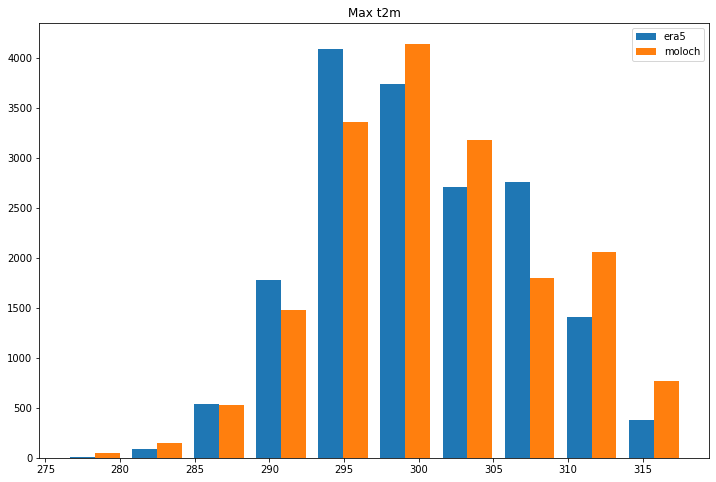

In [66]:
plt.figure(figsize=(12,8))
plt.title("Max t2m")
plt.hist([values_t2m_era5, values_t2m_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

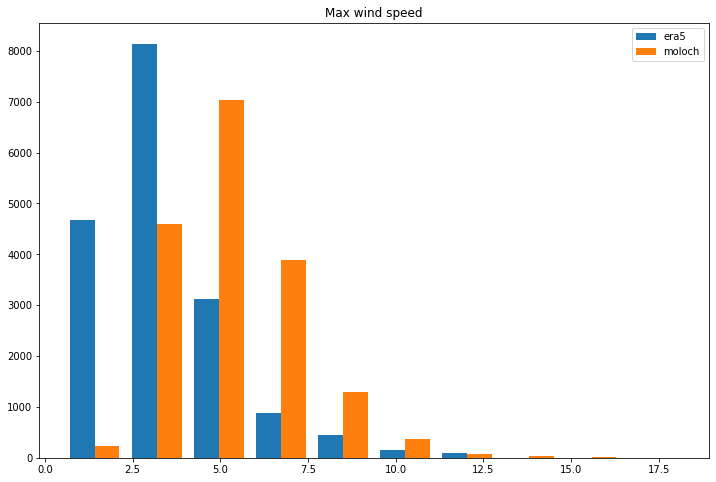

In [67]:
plt.figure(figsize=(12,8))
plt.title("Max wind speed")
plt.hist([values_wind_speed_era5, values_wind_speed_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

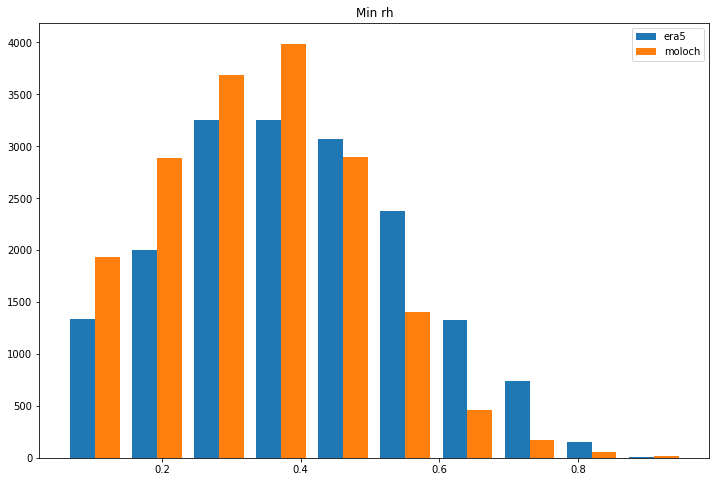

In [68]:
plt.figure(figsize=(12,8))
plt.title("Min rh")
plt.hist([values_rh_era5, values_rh_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

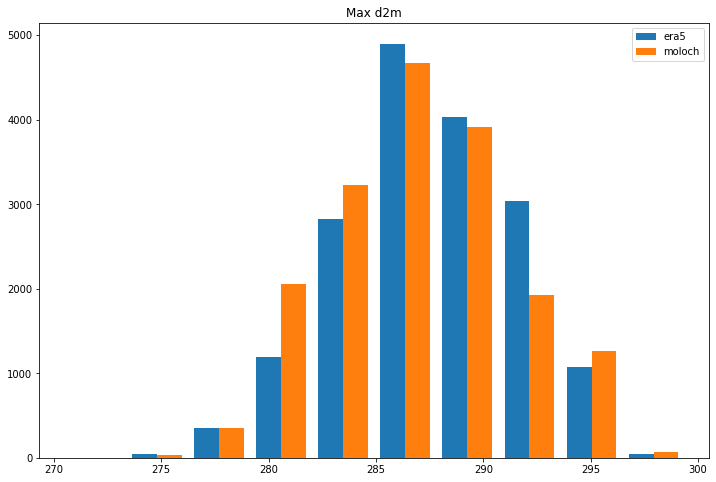

In [69]:
plt.figure(figsize=(12,8))
plt.title("Max d2m")
plt.hist([values_d2m_era5, values_d2m_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

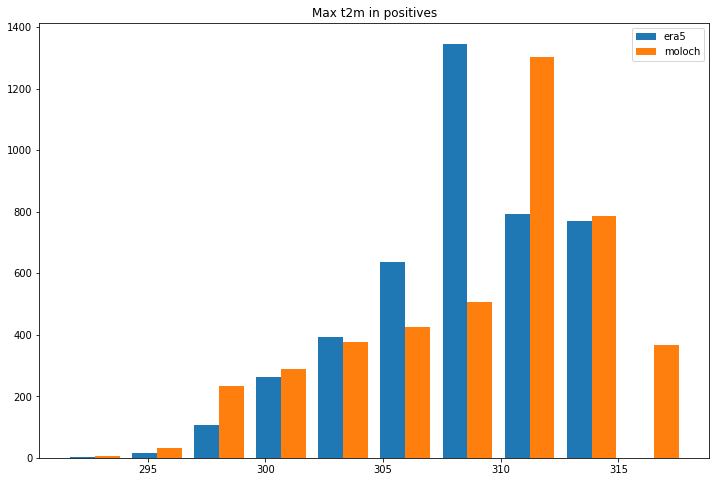

In [70]:
plt.figure(figsize=(12,8))
plt.title("Max t2m in positives")
plt.hist([values_t2m_positives_era5, values_t2m_positives_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

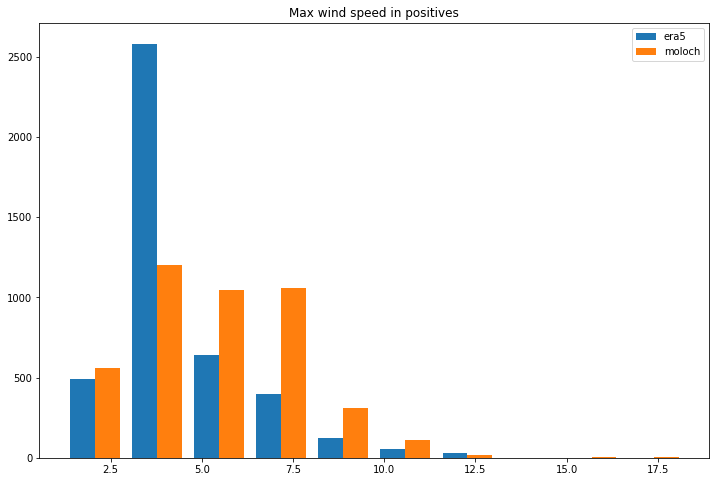

In [71]:
plt.figure(figsize=(12,8))
plt.title("Max wind speed in positives")
plt.hist([values_wind_speed_positives_era5, values_wind_speed_positives_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

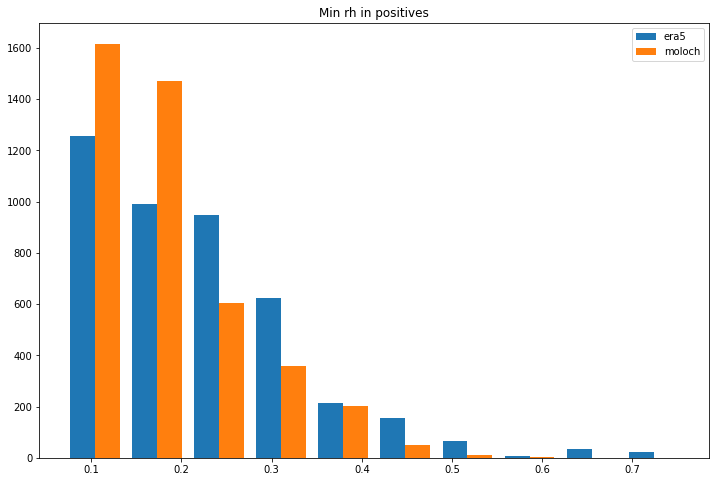

In [73]:
plt.figure(figsize=(12,8))
plt.title("Min rh in positives")
plt.hist([values_rh_positives_era5, values_rh_positives_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

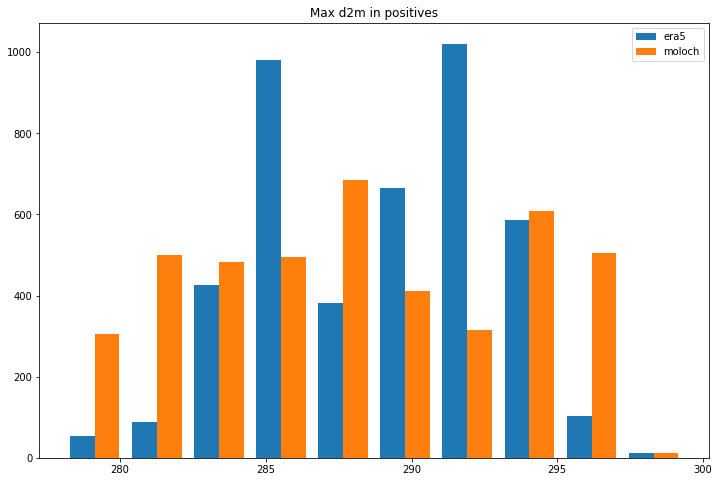

In [74]:
plt.figure(figsize=(12,8))
plt.title("Max d2m in positives")
plt.hist([values_d2m_positives_era5, values_d2m_positives_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

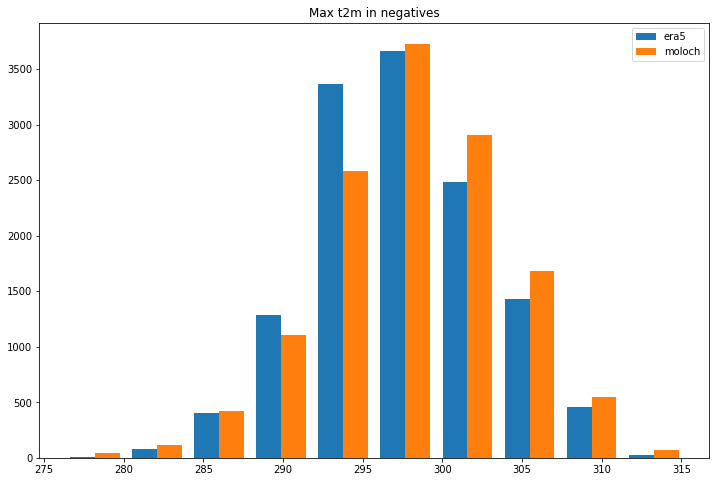

In [75]:
plt.figure(figsize=(12,8))
plt.title("Max t2m in negatives")
plt.hist([values_t2m_negatives_era5, values_t2m_negatives_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

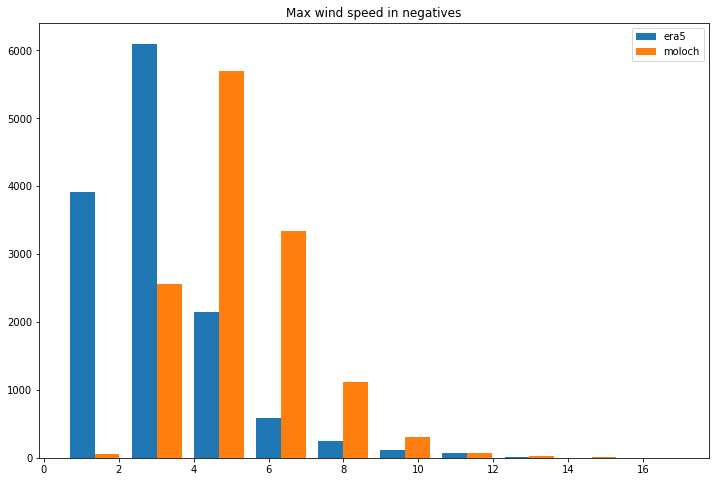

In [76]:
plt.figure(figsize=(12,8))
plt.title("Max wind speed in negatives")
plt.hist([values_wind_speed_negatives_era5, values_wind_speed_negatives_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

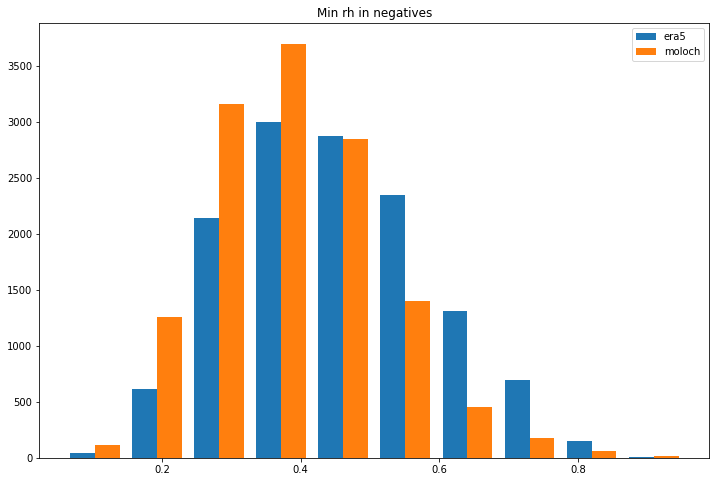

In [77]:
plt.figure(figsize=(12,8))
plt.title("Min rh in negatives")
plt.hist([values_rh_negatives_era5, values_rh_negatives_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

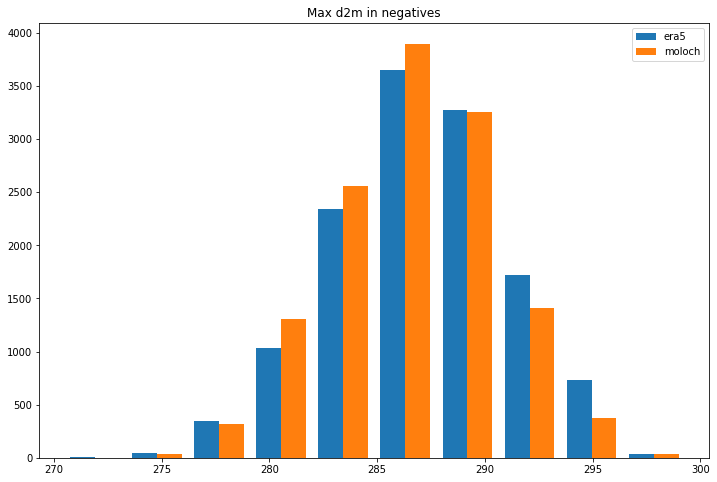

In [78]:
plt.figure(figsize=(12,8))
plt.title("Max d2m in negatives")
plt.hist([values_d2m_negatives_era5, values_d2m_negatives_moloch], label=['era5', 'moloch'])
plt.legend(loc='upper right')
plt.show()

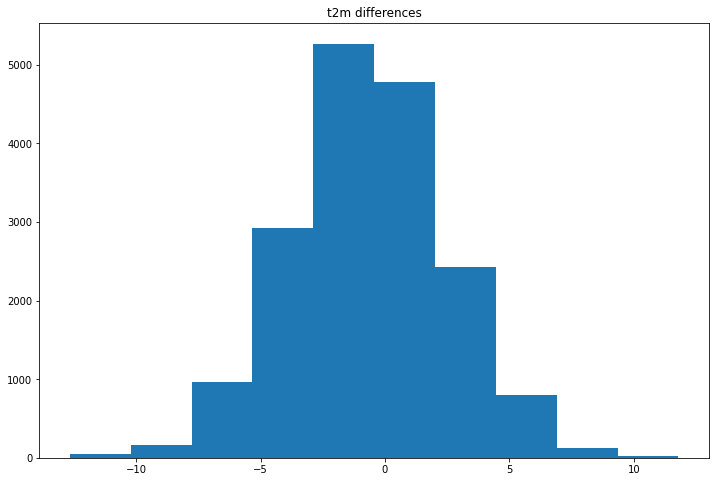

In [79]:
plt.figure(figsize=(12,8))
plt.title("t2m differences")
plt.hist(t2m_difference)
plt.show()

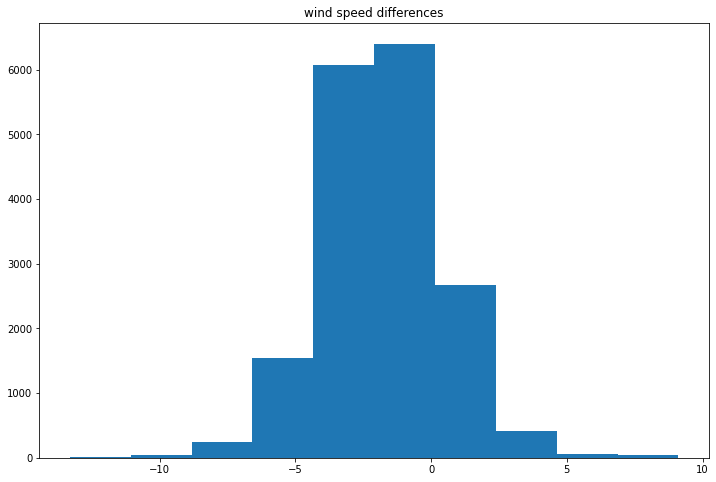

In [80]:
plt.figure(figsize=(12,8))
plt.title("wind speed differences")
plt.hist(wind_speed_difference)
plt.show()

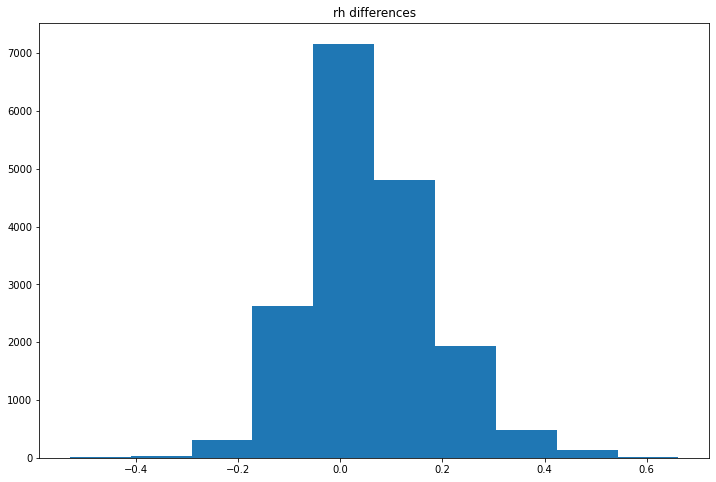

In [82]:
plt.figure(figsize=(12,8))
plt.title("rh differences")
plt.hist(rh_difference)
plt.show()

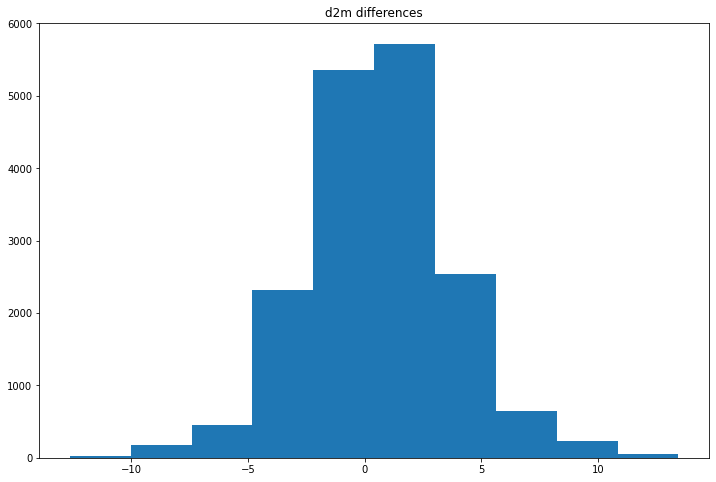

In [84]:
plt.figure(figsize=(12,8))
plt.title("d2m differences")
plt.hist(d2m_difference)
plt.show()

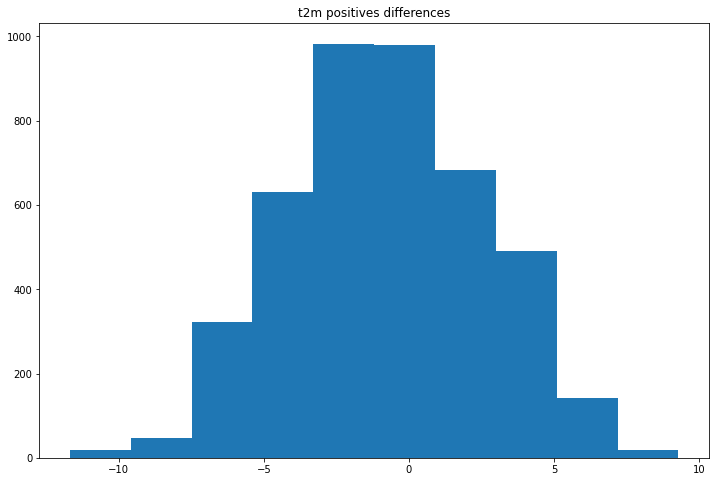

In [85]:
plt.figure(figsize=(12,8))
plt.title("t2m positives differences")
plt.hist(t2m_positives_difference)
plt.show()

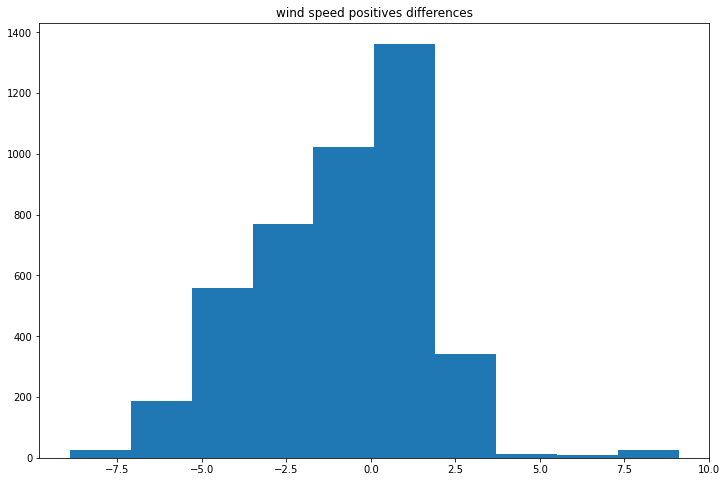

In [86]:
plt.figure(figsize=(12,8))
plt.title("wind speed positives differences")
plt.hist(wind_speed_positives_difference)
plt.show()

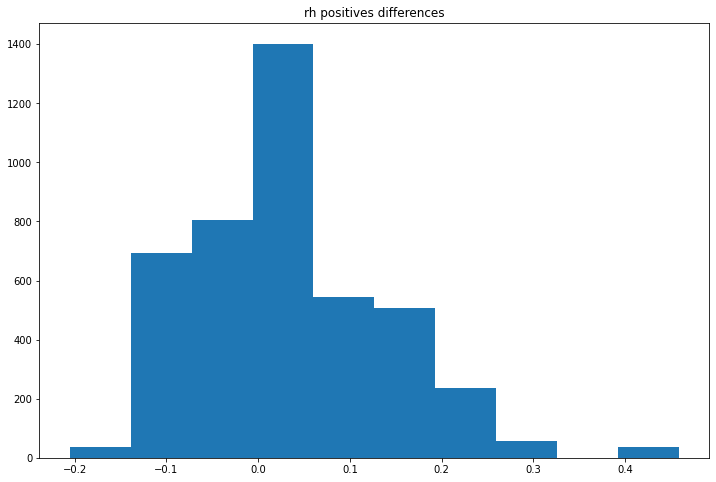

In [87]:
plt.figure(figsize=(12,8))
plt.title("rh positives differences")
plt.hist(rh_positives_difference)
plt.show()

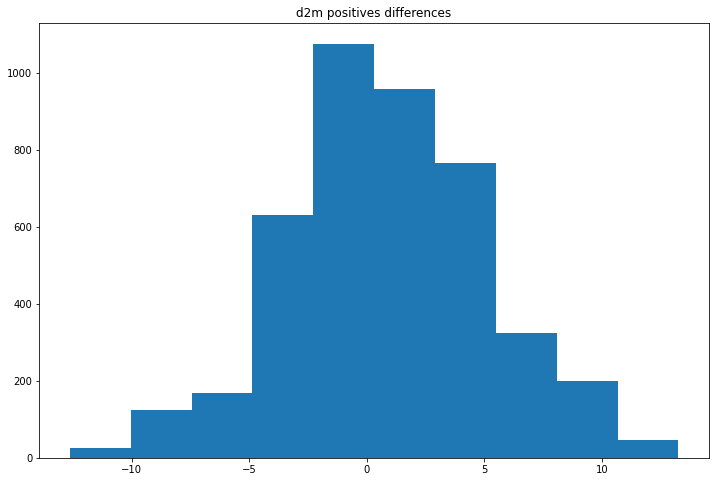

In [88]:
plt.figure(figsize=(12,8))
plt.title("d2m positives differences")
plt.hist(d2m_positives_difference)
plt.show()

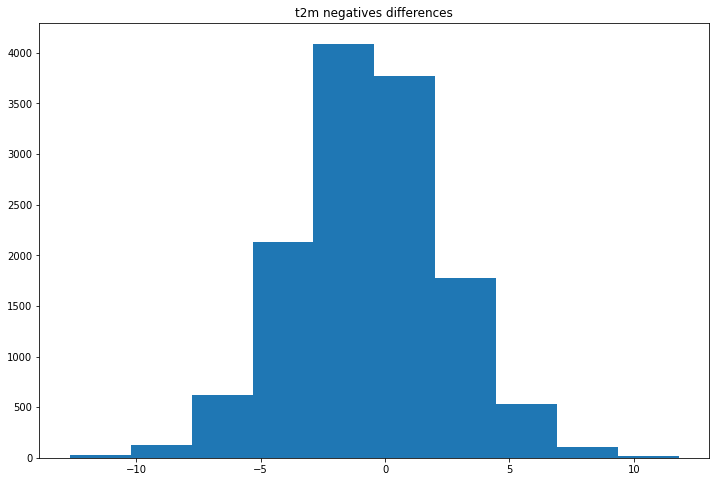

In [89]:
plt.figure(figsize=(12,8))
plt.title("t2m negatives differences")
plt.hist(t2m_negatives_difference)
plt.show()

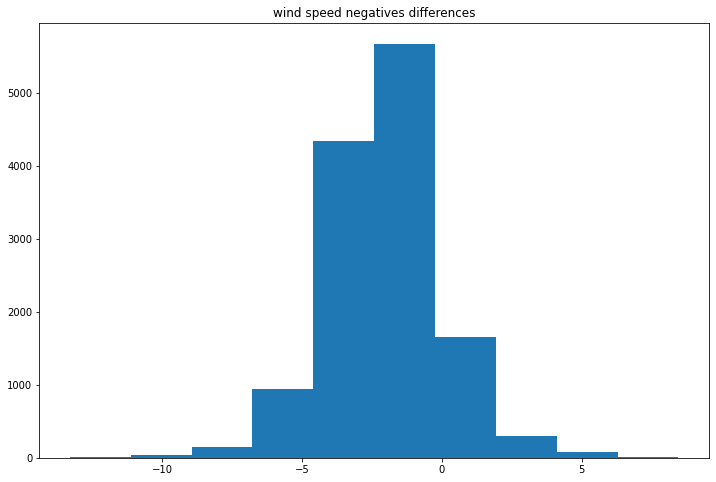

In [90]:
plt.figure(figsize=(12,8))
plt.title("wind speed negatives differences")
plt.hist(wind_speed_negatives_difference)
plt.show()

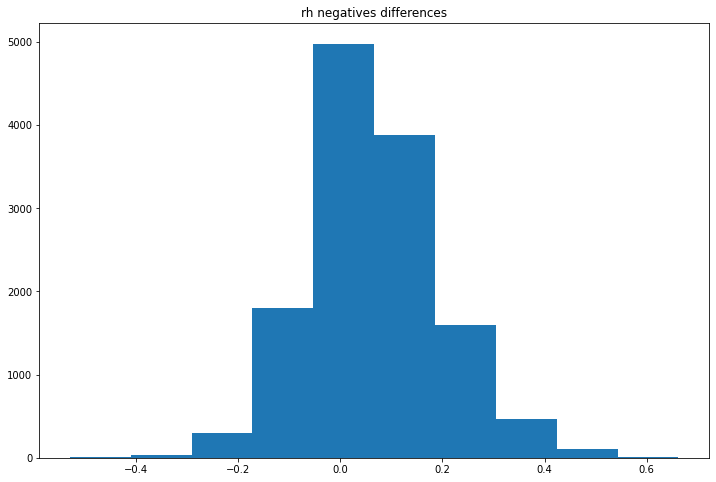

In [91]:
plt.figure(figsize=(12,8))
plt.title("rh negatives differences")
plt.hist(rh_negatives_difference)
plt.show()

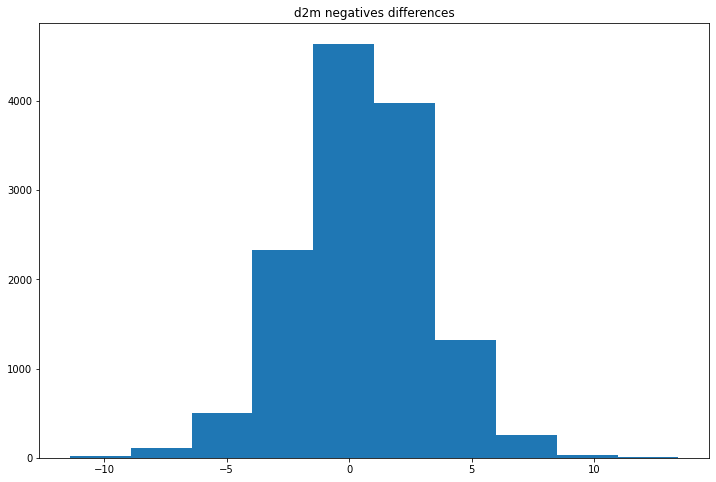

In [92]:
plt.figure(figsize=(12,8))
plt.title("d2m negatives differences")
plt.hist(d2m_negatives_difference)
plt.show()